# Assignment 2

## Problem 1:Linear Regression

### Task 1:Load the dataset named assignment2_part1.csv 



In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pylab as plt
%pylab inline


Populating the interactive namespace from numpy and matplotlib


/Users/cindy/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [11]:
path='data4'

In [12]:
data1 = pd.read_csv(path+"assignment2_part1.csv")

IOError: [Errno 2] File data4assignment2_part1.csv does not exist: 'data4assignment2_part1.csv'

### Task 2:Split this given dataset into training set,testing set and validation set (80% data as training set,10% as validation and other 10% as testing). 
We suggest to split it serially taking the first 80% for training, next 10% for validatation, last 10% for test, to avoid unstable results. Random splits are also accepted as a solution however, but be aware that this way your results may change from run to run.

In [4]:
data1_2=data1.loc[65:72]
data1_3=data1.loc[73:80]
data1=data1.loc[0:64]

### Task 3: Visualize the training data and try to fit a linear (regression) model to it and comment whether you think this data is suitable to fit a linear model.

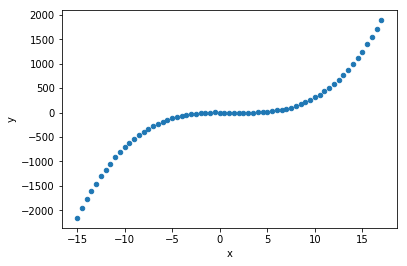

In [5]:
data1.plot(x='x',y='y',kind='scatter')

In [6]:
lm = smf.ols(formula='y~x', data = data1).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     316.0
Date:                Fri, 08 Nov 2019   Prob (F-statistic):           3.08e-26
Time:                        09:24:28   Log-Likelihood:                -468.25
No. Observations:                  65   AIC:                             940.5
Df Residuals:                      63   BIC:                             944.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -125.3147     41.223     -3.040      0.0

### Task 4: Visualize the regression fit

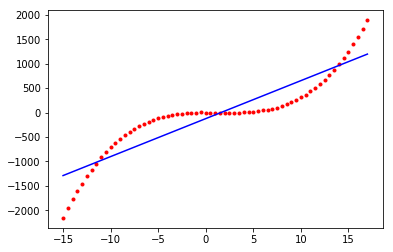

In [7]:
data1['ypred']=lm.predict() #predicted regression values
plt.plot(data1.x,data1.y,'.r') #plot the data
plt.plot(data1.x,data1.ypred,'b') #plot the regression

### Task 5: Try to introduce another regressor variable (x**2) if you think that linear model was not apropriate for this.

In [8]:
data1['x2']=data1.x**2

### Task 6: Fit a regression model to it,now with 2 regressor variables(x,x**2) and also visualize the results

In [9]:
lm = smf.ols(formula='y~x+x2', data = data1).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     158.3
Date:                Fri, 08 Nov 2019   Prob (F-statistic):           4.39e-25
Time:                        09:24:29   Log-Likelihood:                -467.77
No. Observations:                  65   AIC:                             941.5
Df Residuals:                      62   BIC:                             948.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -81.9316     61.309     -1.336      0.1

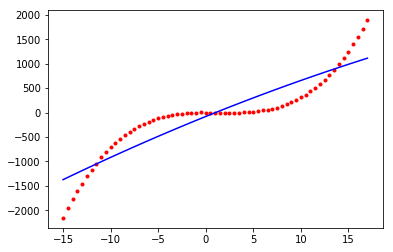

In [10]:
data1['ypred']=lm.predict() #predicted regression values
plt.plot(data1.x,data1.y,'.r') #plot the data
plt.plot(data1.x,data1.ypred,'b') #plot the regression

### Task 7: Generate regressors in the training and validation sample as powers of x from x ** 2 to x ** 12 (i.e max power M=12) and compute the model prediction.Visualize the fit of the model.

In [11]:
M=12
for p in range(1,M+1): #add more powers of x up to 12th
    data1['x%d'%p]=data1.x**p
data1.head()

,Unnamed: 0,x,y,ypred,x2,x1,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12
0,0,-15.0,-2156.994097,-1374.327770,225.00,-15.0,-3375.000,50625.0000,-759375.00000,1.139062e+07,-1.708594e+08,2.562891e+09,-3.844336e+10,5.766504e+11,-8.649756e+12,1.297463e+14
1,1,-14.5,-1956.523904,-1327.632637,210.25,-14.5,-3048.625,44205.0625,-640973.40625,9.294114e+06,-1.347647e+08,1.954088e+09,-2.833427e+10,4.108469e+11,-5.957280e+12,8.638056e+13
2,2,-14.0,-1778.151738,-1281.186832,196.00,-14.0,-2744.000,38416.0000,-537824.00000,7.529536e+06,-1.054135e+08,1.475789e+09,-2.066105e+10,2.892547e+11,-4.049565e+12,5.669391e+13
3,3,-13.5,-1610.924846,-1234.990355,182.25,-13.5,-2460.375,33215.0625,-448403.34375,6.053445e+06,-8.172151e+07,1.103240e+09,-1.489375e+10,2.010656e+11,-2.714385e+12,3.664420e+13
4,4,-13.0,-1456.176307,-1189.043206,169.00,-13.0,-2197.000,28561.0000,-371293.00000,4.826809e+06,-6.274852e+07,8.157307e+08,-1.060450e+10,1.378585e+11,-1.792160e+12,2.329809e+13


In [12]:
formula='y~x+'+'+'.join(['x%d'%p for p in range(2,M+1)]); formula

'y~x+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12'

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.620e+05
Date:                Fri, 08 Nov 2019   Prob (F-statistic):          3.21e-126
Time:                        09:24:29   Log-Likelihood:                -150.32
No. Observations:                  65   AIC:                             326.6
Df Residuals:                      52   BIC:                             354.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.7337      0.979     -3.816      0.0

Text(0,0.5,'y')

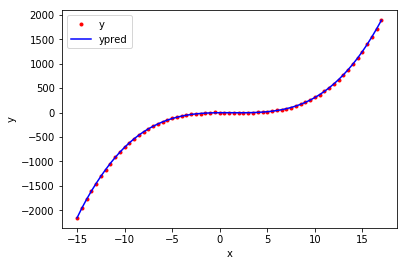

In [13]:
lm12 = smf.ols(formula=formula, data = data1).fit()
print(lm12.summary())
data1['ypred']=lm12.predict() #predicted regression values
plt.plot(data1.x,data1.y,'.r') #plot the data
plt.plot(data1.x,data1.ypred,'b') #plot the regression
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

### Task 8:Train the polinomial model over training sample and compute R2 over the validation data for each power m=1,2,...12

In [1]:
M=12
for p in range(1,M+1): #add more powers of x up to M'th
    data1_2['x%d'%p]=data1_2.x**p
data1_2['ypred']=lm12.predict(data1_2)

NameError: name 'data1_2' is not defined

Text(0,0.5,'y')

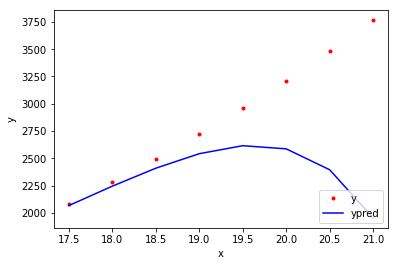

In [15]:
plt.plot(data1_2.x,data1_2.y,'.r') #plot the data
plt.plot(data1_2.x,data1_2.ypred,'b') #plot the regression
plt.legend(loc='lower right')
plt.xlabel('x')
plt.ylabel('y')


In [16]:
ValidR2=1-((data1_2.ypred-data1_2.y)**2).sum()/((data1_2.y-data1_2.y.mean())**2).sum()
ValidR2

-1.0643286134743266

In [17]:
TrainR2=[0]*12
ValidR2=[0]*12
lm=[0]*12
for M in range(1,12):
    formula='y~x'+'+'*(M>1)+'+'.join(['x%d'%p for p in range(2,M+1)]);
    lm[M-1] = smf.ols(formula=formula, data = data1).fit()
    data1_2['ypred']=lm[M-1].predict(data1_2)
    ValidR2[M-1]=1-((data1_2.ypred-data1_2.y)**2).sum()/((data1_2.y-data1_2.y.mean())**2).sum()
    TrainR2[M-1]=lm[M-1].rsquared

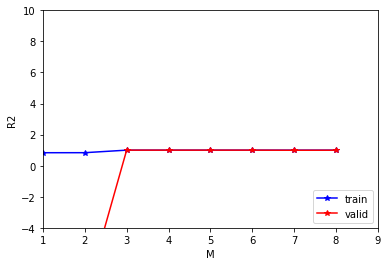

In [18]:
plt.plot(range(1,9),TrainR2[:8],'b-*',label='train')
plt.plot(range(1,9),ValidR2[:8],'r-*',label='valid')
plt.xlabel('M')
plt.ylabel('R2')
plt.ylim(-4,10)
plt.xlim(1,9)
plt.legend(loc='lower right')

### Task 9: What is the optimal value of $1\leq m\leq M$ in terms of the validation R2?

In [19]:

M=np.argmax(ValidR2)+1; M

5

### Task 10:Generate regressors in the test sample and compute the model prediction for the optimal m you found

In [20]:
for p in range(1,M+1): #add more powers of x up to M'th
    data1_3['x%d'%p]=data1_3.x**p
data1_3['ypred']=lm[M-1].predict(data1_3)
TestR2=1-((data1_3.ypred-data1_3.y)**2).sum()/((data1_3.y-data1_3.y.mean())**2).sum()
TestR2

0.999892975155518

### Task 11:Visulaize results of Task 10.

Text(0,0.5,'y')

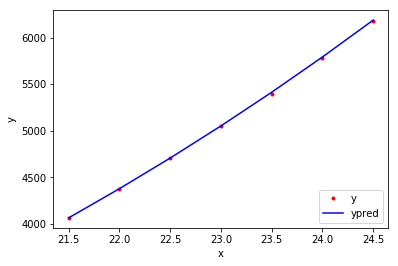

In [21]:
plt.plot(data1_3.x,data1_3.y,'.r') #plot the data
plt.plot(data1_3.x,data1_3.ypred,'b') #plot the regression
plt.legend(loc='lower right')

plt.xlabel('x')
plt.ylabel('y')

## Problem 2:Refer to the in class session_05_02 diagnostics python notebook ,to complete this part of the assignment.

### Task 1: Perform regression of Income vs three regressors: Bachelor, "Advanced" (which aggregates Master, Doctorate and ProfSchool) and "Other" (aggregating all education levels less than Bachelor)

In [22]:
data4 = pd.read_csv(path+"IncomeEduReg.csv")
data4['Income'] = data4['IncomePerCapita'] * data4['PopOver25']
data4 = data4.dropna()

In [23]:
data4['Advanced']=data4.Master+data4.Doctorate+data4.ProfSchool
data4['Other']=data4.PopOver25-data4.Advanced-data4.Bachelor

In [24]:
lm3 = smf.ols(formula = 'Income ~ Bachelor + Advanced + Other-1', data = data4).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                 Income   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     1106.
Date:                Fri, 08 Nov 2019   Prob (F-statistic):          8.50e-115
Time:                        09:24:30   Log-Likelihood:                -3804.4
No. Observations:                 181   AIC:                             7615.
Df Residuals:                     178   BIC:                             7624.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Bachelor    4.858e+04   1.58e+04      3.072      0.0

### Task 2: Visualize the regression fit by plotting the observations versus regression prediction for the income per each zip code (as a scatter plot)

Text(0,0.5,'Observed Income')

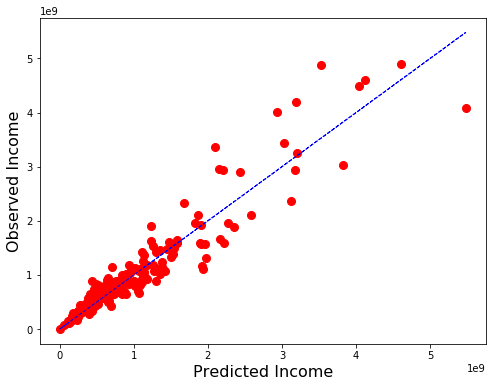

In [25]:
y_fit = lm3.predict(data4)   # Calculate the predicted value
plt.figure(figsize = (8,6))
plt.plot(y_fit,data4.Income,'or', markersize = 8) # Plot the observed value, linestyle = 'or', red dots
plt.plot(y_fit,y_fit,'--b', linewidth = 1)                 # Plot the predicted value, blue dashed line

# Plot setting
plt.xlabel('Predicted Income', fontsize = 16)
plt.ylabel('Observed Income', fontsize = 16)

## Problem 3:Refer to in class session_05_01 Scaling python notebook to complete this part of the assignment.

### Task 1:Establish a scaling relationship  $Y\sim CX^q$  between total, violent and property crime vs population for each city (msa)
by running log-scale regression where Crime>0. Visualize on the log scale. Does $q=1$ fall into the 95% confidence interval? What about 99% CI?

In [26]:
#Your code here
crime2014 = pd.read_csv(path+'R11460954_SL050.csv') #Load crime data

In [27]:
#You have to aggregate the data per msa first; please use the following dataframe for that similarly to how it has been done in the class notebook
msa = pd.read_csv(path+'msalist.csv',encoding='cp1252')

In [28]:
crime2014.rename(columns = { u'SE_T001_001' : 'Population',\
                             u'SE_T002_001' : 'Crimes',\
                          u'SE_T002_002' : 'Violent Crimes', \
                          u'SE_T002_003' : 'Property Crimes' }, inplace=True)

crime2014 = crime2014[[u'Geo_FIPS', u'Geo_NAME', u'Geo_QNAME', u'Geo_STATE', u'Geo_COUNTY', 'Population', 'Crimes' , 'Violent Crimes', 'Property Crimes']]

In [29]:
def num(s):
    try:
        return int(s)
    except ValueError:
        0
crime2014['ID'] = crime2014.Geo_FIPS.apply(num)
msa['ID'] = msa.Geo_FIPS.apply(num)

crimemsa = pd.merge(crime2014, msa, on='ID', how='inner')
crimemsa.head()

,Geo_FIPS_x,Geo_NAME,Geo_QNAME,Geo_STATE,Geo_COUNTY,Population,Crimes,Violent Crimes,Property Crimes,ID,msa,msa_name,Geo_FIPS_y,county
0,01001,Autauga County,"Autauga County, Alabama",1,001,55395.0,482,68,414,1001.0,33860,"Montgomery, AL (Metropolitan Statistical Area)",1001,"Autauga, AL"
1,01003,Baldwin County,"Baldwin County, Alabama",1,003,200111.0,760,98,662,1003.0,19300,"Daphne-Fairhope-Foley, AL (Metropolitan Statis...",1003,"Baldwin, AL"
2,01007,Bibb County,"Bibb County, Alabama",1,007,22506.0,86,4,82,1007.0,13820,"Birmingham-Hoover, AL (Metropolitan Statistica...",1007,"Bibb, AL"
3,01009,Blount County,"Blount County, Alabama",1,009,57719.0,1013,90,923,1009.0,13820,"Birmingham-Hoover, AL (Metropolitan Statistica...",1009,"Blount, AL"
4,01015,Calhoun County,"Calhoun County, Alabama",1,015,115916.0,486,15,471,1015.0,11500,"Anniston-Oxford-Jacksonville, AL (Metropolitan...",1015,"Calhoun, AL"


In [30]:
msaCrime = crimemsa.groupby(by='msa').sum().loc[:,[u'Population', u'Crimes', u'Violent Crimes', u'Property Crimes']]
msaCrime.head()

,Population,Crimes,Violent Crimes,Property Crimes
msa,,,,
10180,168592.0,492,62,430
10420,703825.0,2397,106,2291
10500,151670.0,1364,107,1257
10540,119356.0,1092,23,1069
10580,880167.0,1590,91,1499


In [31]:
logPop = np.log(msaCrime['Population'])
logCrime = np.log(msaCrime['Crimes'])
logVCrime = np.log(msaCrime['Violent Crimes'])
logPCrime = np.log(msaCrime['Property Crimes'])
logPop=logPop
data = pd.DataFrame({'Population':logPop, 'Crime':logCrime, 'VCrime':logVCrime, 'PCrime': logPCrime})
#data.reset_index(inplace=True, drop=True) #reseting index 
data.head()

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


,Crime,PCrime,Population,VCrime
msa,,,,
10180,6.198479,6.063785,12.035237,4.127134
10420,7.781973,7.736744,13.464285,4.663439
10500,7.218177,7.136483,11.929462,4.672829
10540,6.995766,6.974479,11.689866,3.135494
10580,7.371489,7.312553,13.687867,4.510860


In [32]:
lm = smf.ols('Crime~Population', data=data[data.Crime>0]).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Crime   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                     191.4
Date:                Fri, 08 Nov 2019   Prob (F-statistic):           9.89e-35
Time:                        09:24:30   Log-Likelihood:                -525.93
No. Observations:                 336   AIC:                             1056.
Df Residuals:                     334   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.9840      0.736     -4.056      0.000      -4.431      -1.537
Population     0.8087      0.058     13.836      0.000       0.694       0.924
==============================================================================
Omnibus:                      218.321   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2258.587
Skew:                          -2.598   Prob(JB):                         0.00
Kurtosis:                      14.590   Cond. No.                         147.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

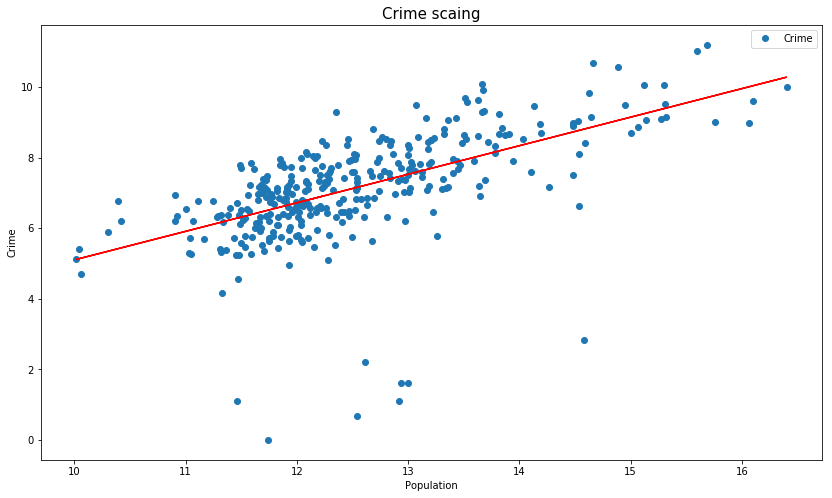

In [33]:
plt.figure(figsize=(14,8))
plt.plot(data['Population'], data['Crime'], 'o')
plt.title('Crime scaing', fontsize = 15)
plt.xlabel('Population')
plt.ylabel('Crime')
plt.plot(data['Population'][data.Crime>0], lm.predict(), '-r')
plt.legend()

### Task 2: Find top 5 and last 5 cities (msa) by crime log-residual (difference between log-crime and above regression prediction)

In [34]:
msaCrime['CrimeRes']=data['Crime']-lm.params.Population*data['Population']-lm.params.Intercept
msaCrime.sort_values(by='CrimeRes',ascending=False).head(5)

,Population,Crimes,Violent Crimes,Property Crimes,CrimeRes
msa,,,,,
31420,230450.0,10881,869,10012,2.293371
24860,862463.0,24316,3316,21000,2.030230
37860,474081.0,13234,1980,11254,1.905808
35380,867529.0,20326,2322,18004,1.846260
36740,2321418.0,43637,7202,36435,1.814296


### Task 3:Is there any correlation between residual by income and residual by crime?

In [36]:

demographics = pd.read_csv(path+'R11460953_SL050.csv',encoding='cp1252')

In [37]:
demographics = demographics[[ u'Geo_GEOID', u'Geo_NAME', u'Geo_QName', u'Geo_COUNTY',\
                             u'SE_T001_001', u'SE_T002_002', u'SE_T002_003', u'SE_T057_001', u'SE_T083_001']]

demographics.rename(columns={u'SE_T001_001' : 'Population',\
                             u'SE_T002_002' : 'Population Density', \
                             u'SE_T002_003' : 'Area',\
                             u'SE_T057_001' : 'Median household income',\
                             u'SE_T083_001' : 'Per capita income'}, inplace=True)

In [38]:
demographics['Income']=demographics.Population*demographics['Per capita income']
def num(s):
    try:
        return int(s)
    except ValueError:
        0

demographics['ID'] = demographics.Geo_GEOID.apply(lambda x: num(x[7:]))
msa['ID'] = msa.Geo_FIPS.apply(num)

demomsa = pd.merge(demographics, msa, on='ID', how='inner')
demomsa.head()

,Geo_GEOID,Geo_NAME,Geo_QName,Geo_COUNTY,Population,Population Density,Area,Median household income,Per capita income,Income,ID,msa,msa_name,Geo_FIPS,county
0,05000US01001,"Autauga County, Alabama","Autauga County, Alabama",1,55136,92.75346,594.436089,52475,24644,1358771584,1001,33860,"Montgomery, AL (Metropolitan Statistical Area)",1001,"Autauga, AL"
1,05000US01003,"Baldwin County, Alabama","Baldwin County, Alabama",3,191205,120.27100,1589.784070,50183,26851,5134045455,1003,19300,"Daphne-Fairhope-Foley, AL (Metropolitan Statis...",1003,"Baldwin, AL"
2,05000US01007,"Bibb County, Alabama","Bibb County, Alabama",7,22653,36.38555,622.582332,37984,18110,410245830,1007,13820,"Birmingham-Hoover, AL (Metropolitan Statistica...",1007,"Bibb, AL"
3,05000US01009,"Blount County, Alabama","Blount County, Alabama",9,57645,89.40315,644.775905,44409,20501,1181780145,1009,13820,"Birmingham-Hoover, AL (Metropolitan Statistica...",1009,"Blount, AL"
4,05000US01015,"Calhoun County, Alabama","Calhoun County, Alabama",15,117186,193.41850,605.867678,40919,21306,2496764916,1015,11500,"Anniston-Oxford-Jacksonville, AL (Metropolitan...",1015,"Calhoun, AL"


In [39]:
msaDemo = demomsa.groupby(by='msa').sum().loc[:,[u'Population', u'Area', u'Income']]

In [40]:
logPop = np.log(msaDemo['Population'])
logIncome = np.log(msaDemo['Income'])
dataLog = pd.DataFrame(data=[logIncome, logPop]).T
dataLog.sort_values(by='Income', ascending=False, inplace=True) #Sorting values for better visualization
dataLog.head()

,Income,Population
msa,,
35620,27.297920,16.804472
31080,26.677462,16.385106
16980,26.425884,16.068532
19100,26.019203,15.718069
37980,26.009518,15.609823


In [41]:
lmIncome = smf.ols('Income~Population', data=dataLog).fit()
lmIncome.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Income   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                 2.157e+04
Date:                Fri, 08 Nov 2019   Prob (F-statistic):               0.00
Time:                        09:24:42   Log-Likelihood:                 175.13
No. Observations:                 379   AIC:                            -346.3
Df Residuals:                     377   BIC:                            -338.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3549      0.092    101.819      0.000       9.174       9.536
Population     1.0633      0.007    146.865      0.000       1.049       1.078
==============================================================================
Omnibus:                       19.243   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.781
Skew:                           0.021   Prob(JB):                     2.10e-12
Kurtosis:                       4.845   Cond. No.                         149.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
msaDemo['IncRes']=lmIncome.predict()-dataLog['Income']

In [43]:
msaDemo.sort_values(by='IncRes',ascending=True).head(5)

,Population,Area,Income,IncRes
msa,,,,
14860,934215,624.889555,46419274920,-0.587838
15680,108472,357.180046,3970292144,-0.418566
14500,305166,726.289252,11756214984,-0.404226
12700,215167,393.723227,7953432988,-0.385023
45940,369526,224.557494,14070071976,-0.380407


In [44]:
resdata=pd.merge(msaCrime, msaDemo, left_index=True, right_index=True, how='inner') 

In [45]:
resdata[['IncRes','CrimeRes']][resdata.Crimes>0].corr()

,IncRes,CrimeRes
IncRes,1.000000,0.186369
CrimeRes,0.186369,1.000000


In [46]:
reslm=smf.ols('CrimeRes~IncRes-1',data=resdata[resdata.Crimes>0]).fit()
reslm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               CrimeRes   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     11.84
Date:                Fri, 08 Nov 2019   Prob (F-statistic):           0.000653
Time:                        09:24:48   Log-Likelihood:                -536.33
No. Observations:                 337   AIC:                             1075.
Df Residuals:                     336   BIC:                             1078.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
IncRes         1.5149      0.440      3.441      0.001       0.649       2.381
==============================================================================
Omnibus:                      222.905   Durbin-Watson:                   1.784
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2290.554
Skew:                          -2.669   Prob(JB):                         0.00
Kurtosis:                      14.603   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

So it seems that wealthier cities are not safer - those outperforming by wealth also tend to outperform by crime. Correlation is weak, but regression is statistically significant (confidence interval does not contain zero).